In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(0)
tf.random.set_seed(0)

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=1000, verbose=0)
predictions = model.predict(X)
rounded = np.round(predictions)

print("===== Perceptron Prediction =====")
print("Input\tExpected\tActual\t\tRemark")
for i in range(len(X)):
    expected = Y[i][0]
    actual = int(rounded[i][0])
    remark = "Correct" if expected == actual else "May fail"
    print(f"{X[i]}\t{expected}\t\t{actual}\t\t{remark}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
===== Perceptron Prediction =====
Input	Expected	Actual		Remark
[0 0]	0		0		Correct
[0 1]	1		0		May fail
[1 0]	1		1		Correct
[1 1]	0		1		May fail


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
===== XOR Problem with MLP =====
Input	Expected	Predicted	Rounded
[0 0]	0		0.2162		0
[0 1]	1		0.6168		1
[1 0]	1		0.8357		1
[1 1]	0		0.1900		0


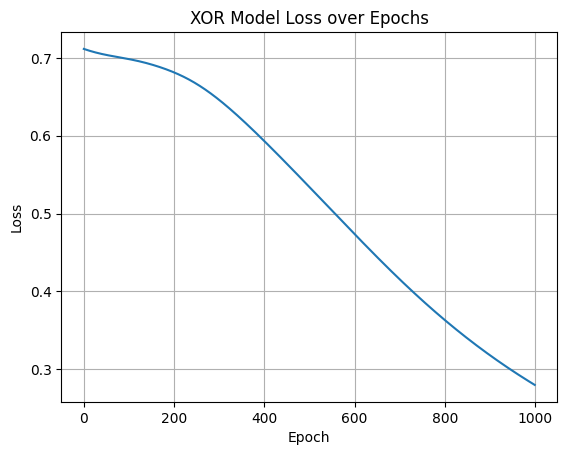

In [2]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])

model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, epochs=1000, verbose=0)

predictions = model.predict(X)
rounded = np.round(predictions)

print("===== XOR Problem with MLP =====")
print("Input\tExpected\tPredicted\tRounded")
for i in range(len(X)):
    print(f"{X[i]}\t{Y[i][0]}\t\t{predictions[i][0]:.4f}\t\t{int(rounded[i][0])}")

plt.plot(history.history['loss'])
plt.title('XOR Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()